## Import Important Libraries

In [1]:
import numpy as np

from qiskit.circuit.library import QFT
import qiskit.visualization as qv
from qiskit import IBMQ, Aer, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

## Defining the QFT Circuit Function

In [41]:
def myQFT(n):
    circuit = QuantumCircuit(n)
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            circuit.cu(0, 0, np.pi/(2**(j-i)),0 , j, i)
        circuit.barrier() 

    for k in range(0, int(n/2)):
        circuit.swap(k, n-1-k) 

    return circuit

myQFT(4).draw()

┌───┐┌──────────────┐┌──────────────┐┌──────────────┐ ░      »
q_0: ┤ H ├┤ U(0,0,π/2,0) ├┤ U(0,0,π/4,0) ├┤ U(0,0,π/8,0) ├─░──────»
     └───┘└──────┬───────┘└──────┬───────┘└──────┬───────┘ ░ ┌───┐»
q_1: ────────────■───────────────┼───────────────┼─────────░─┤ H ├»
                                 │               │         ░ └───┘»
q_2: ────────────────────────────■───────────────┼─────────░──────»
                                                 │         ░      »
q_3: ────────────────────────────────────────────■─────────░──────»
                                                           ░      »
«                                      ░                       ░       ░       
«q_0: ─────────────────────────────────░───────────────────────░───────░──X────
«     ┌──────────────┐┌──────────────┐ ░                       ░       ░  │    
«q_1: ┤ U(0,0,π/2,0) ├┤ U(0,0,π/4,0) ├─░───────────────────────░───────░──┼──X─
«     └──────┬───────┘└──────┬───────┘ ░ ┌───┐┌──────────────┐ ░       ░  │  │ 
«q_2: ───────■───────────────┼─────────░─┤ H ├┤ U(0,0,π/2,0) ├─░───────░──┼──X─
«                            │         ░ └───┘└──────┬───────┘ ░ ┌───┐ ░  │    
«q_3: ───────────────────────■─────────░─────────────■─────────░─┤ H ├─░──X────
«                                      ░                       ░ └───┘ ░

Computational Basis: 0001
Fourier Basis


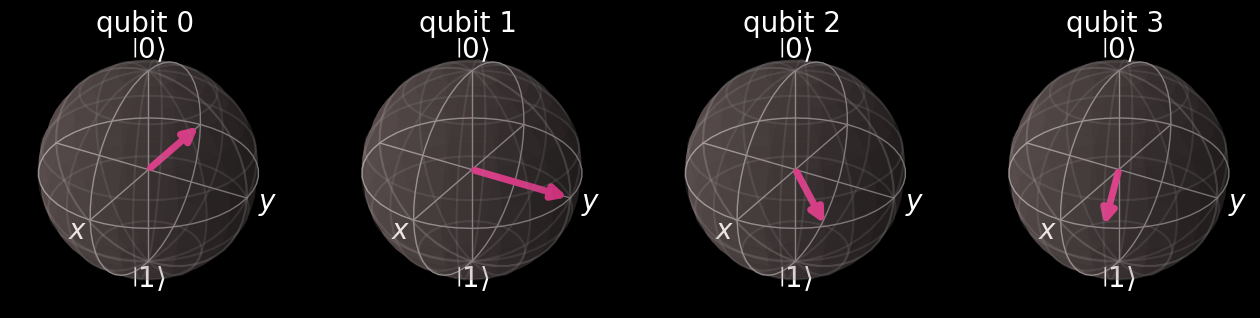

In [47]:
state = "0001"; circuit = QuantumCircuit(len(state))

circuit.initialize(Statevector.from_label(state).data, circuit.qubits[::-1])


print("Computational Basis:", state)

circuit.append(myQFT(len(state)), circuit.qubits)

print("Fourier Basis") ; display(qv.plot_bloch_multivector(Statevector.from_instruction(circuit).data))

## Testing QFT Circuit for all 4 bit Computational basis values

Computational Basis: 0000
Fourier Basis


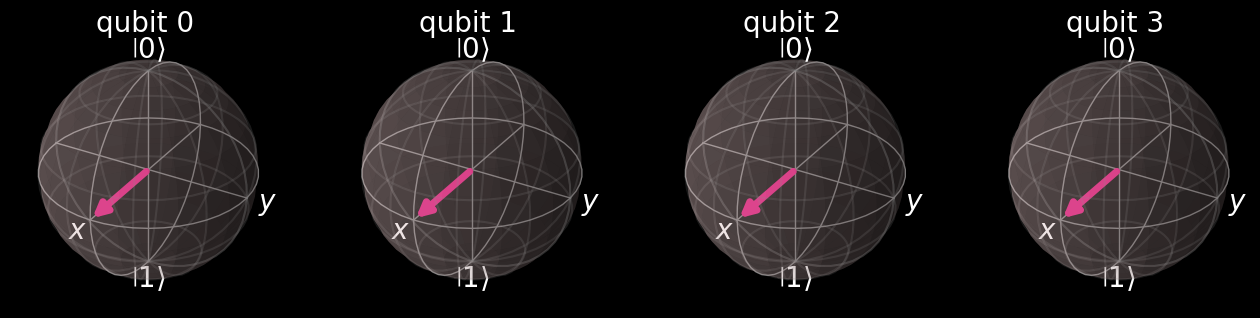

Computational Basis: 0001
Fourier Basis


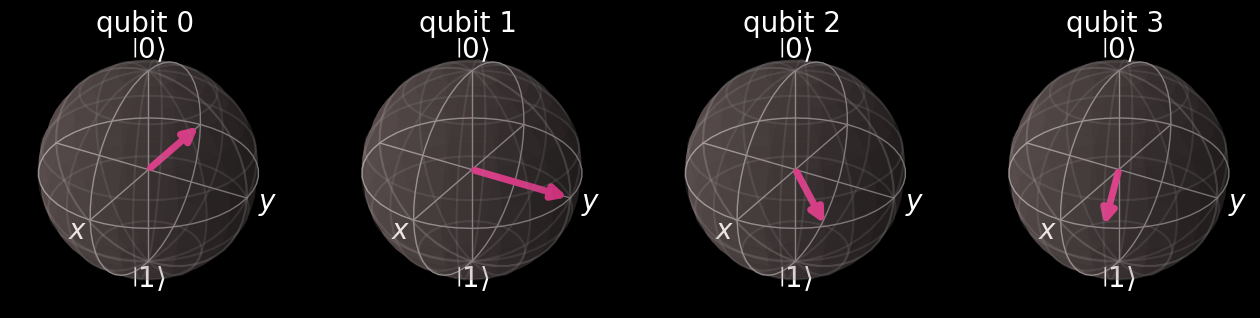

Computational Basis: 0010
Fourier Basis


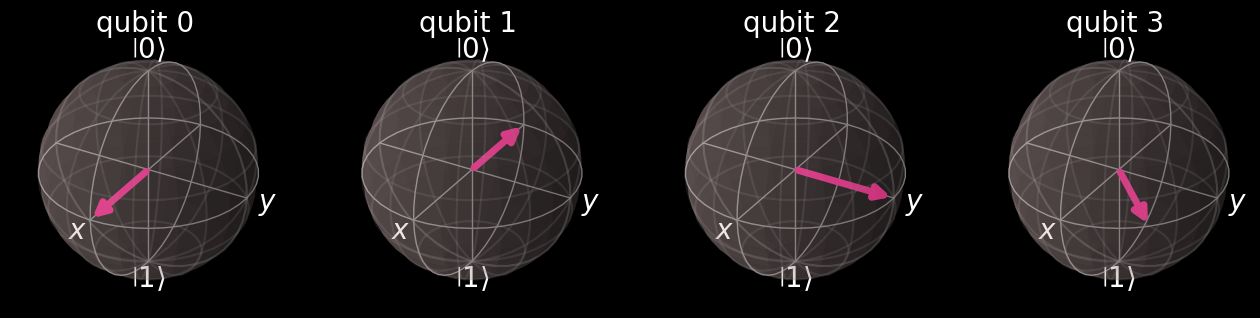

Computational Basis: 0011
Fourier Basis


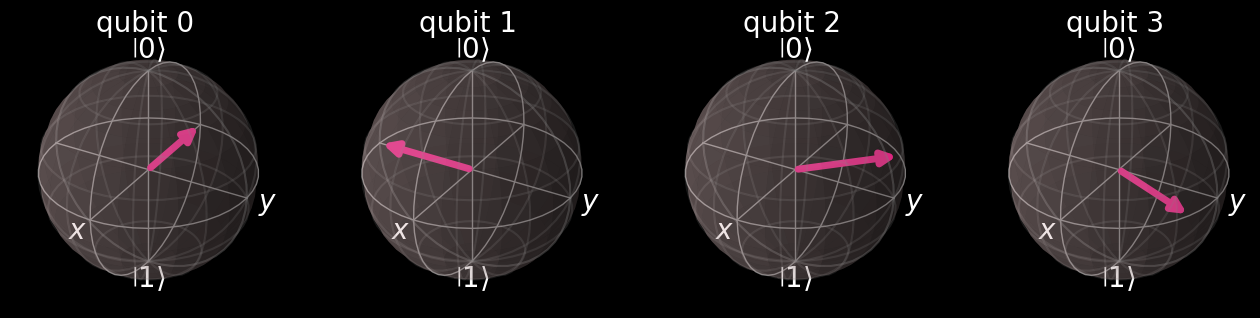

Computational Basis: 0100
Fourier Basis


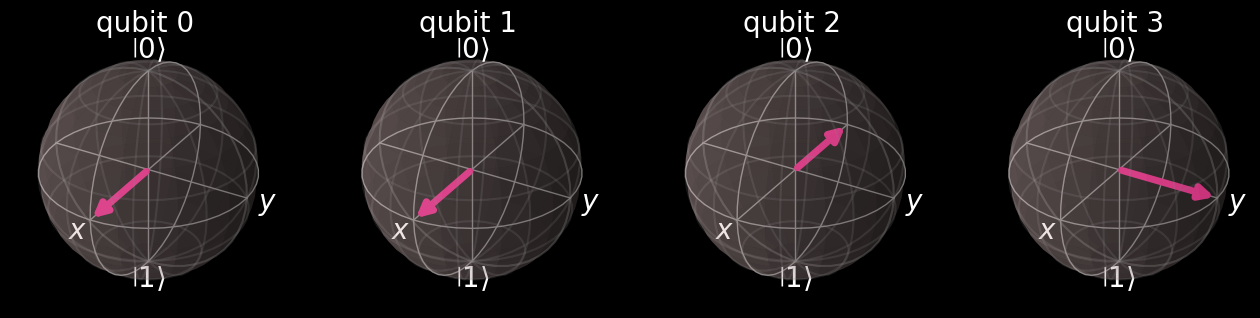

Computational Basis: 0101
Fourier Basis


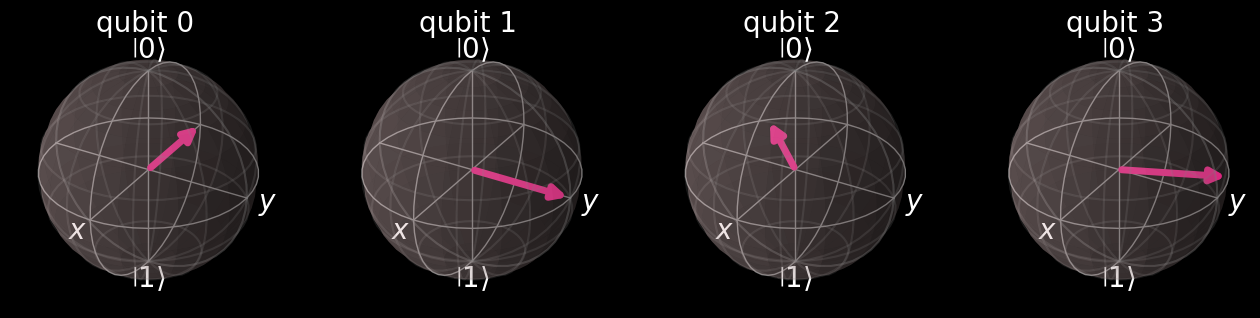

Computational Basis: 0110
Fourier Basis


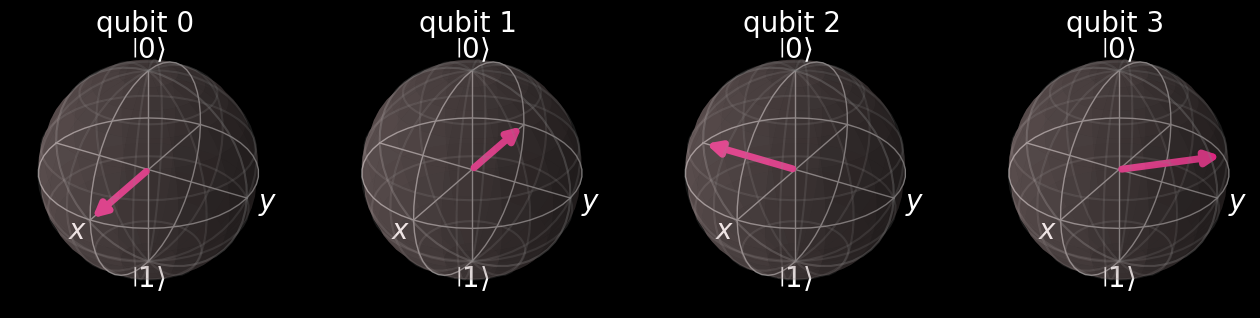

Computational Basis: 0111
Fourier Basis


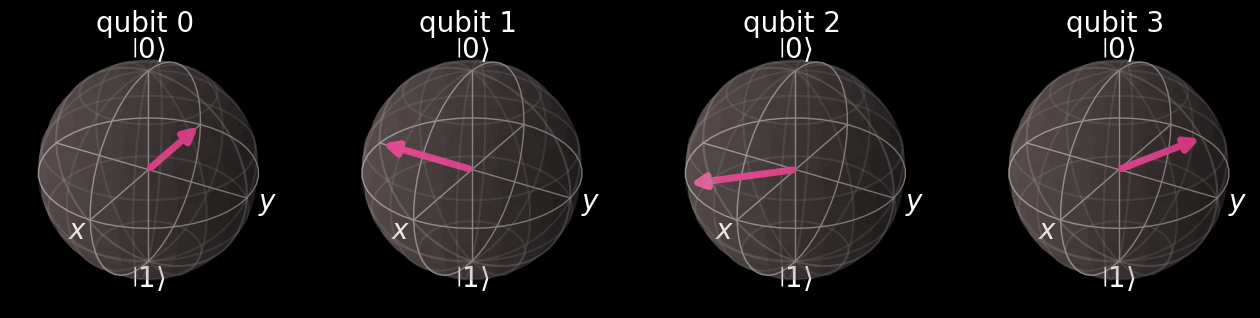

Computational Basis: 1000
Fourier Basis


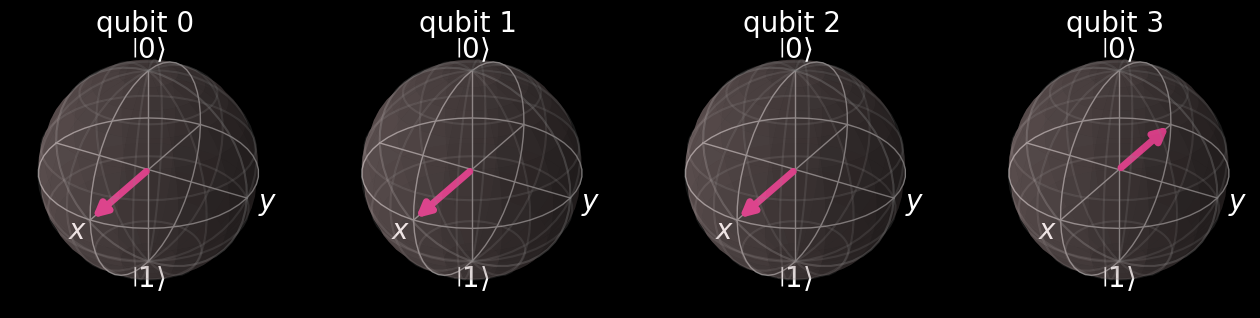

Computational Basis: 1001
Fourier Basis


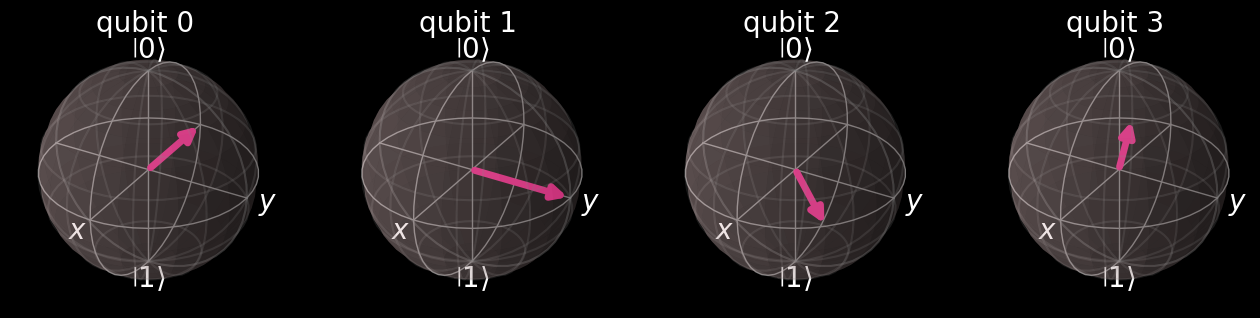

Computational Basis: 1010
Fourier Basis


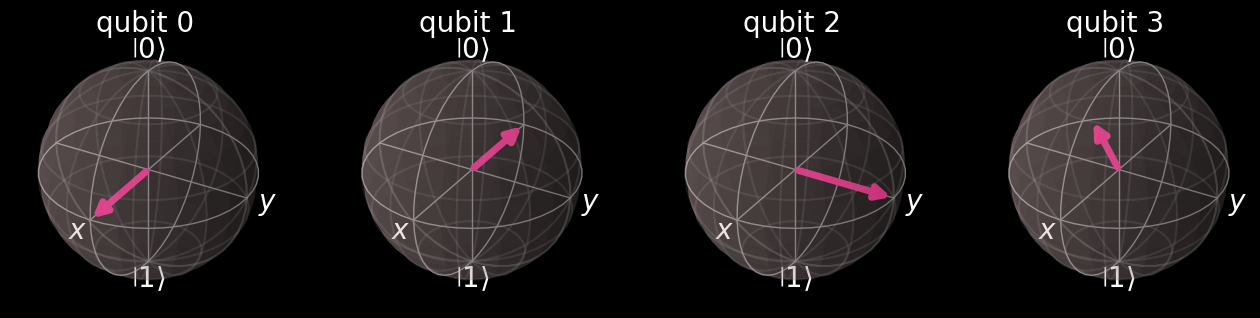

Computational Basis: 1011
Fourier Basis


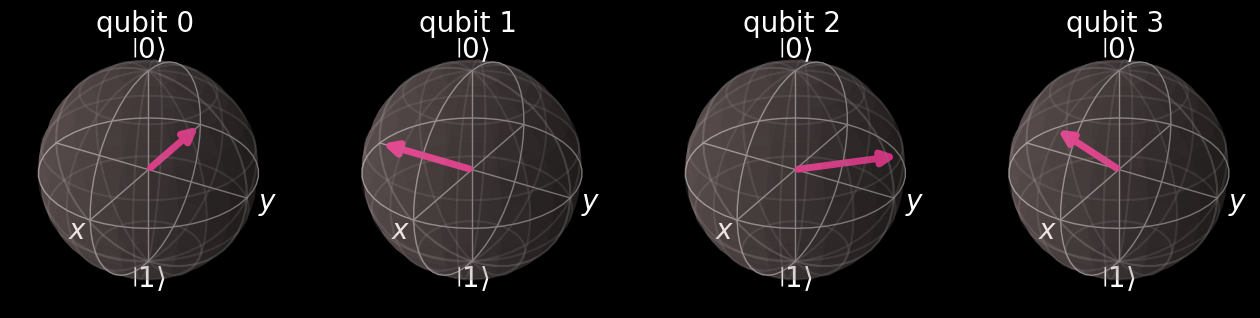

Computational Basis: 1100
Fourier Basis


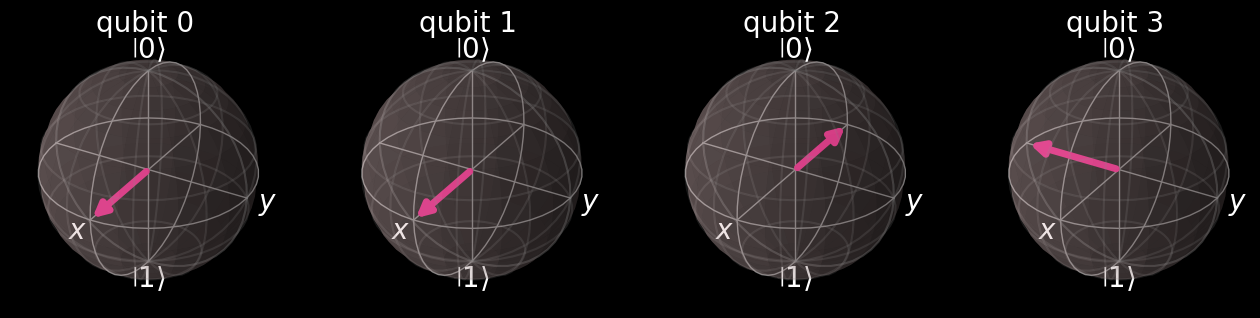

Computational Basis: 1101
Fourier Basis


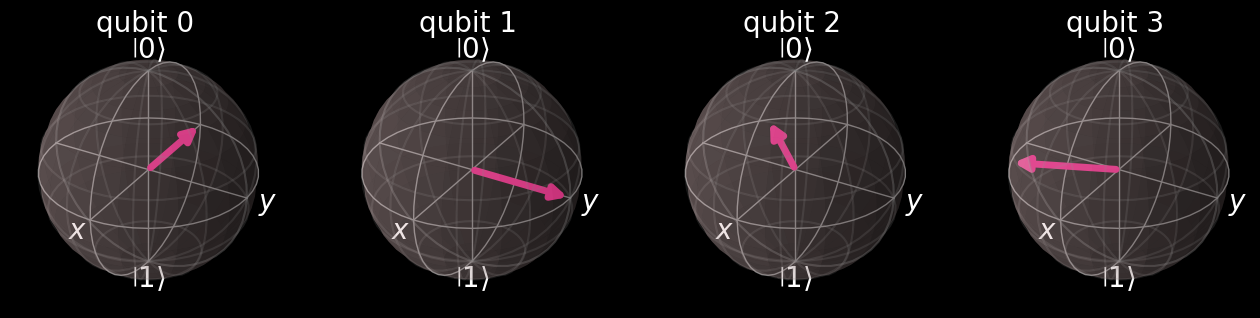

Computational Basis: 1110
Fourier Basis


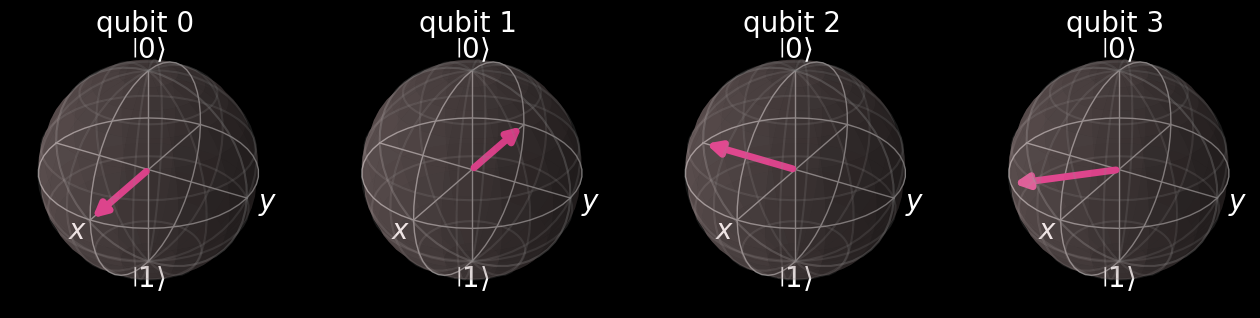

Computational Basis: 1111
Fourier Basis


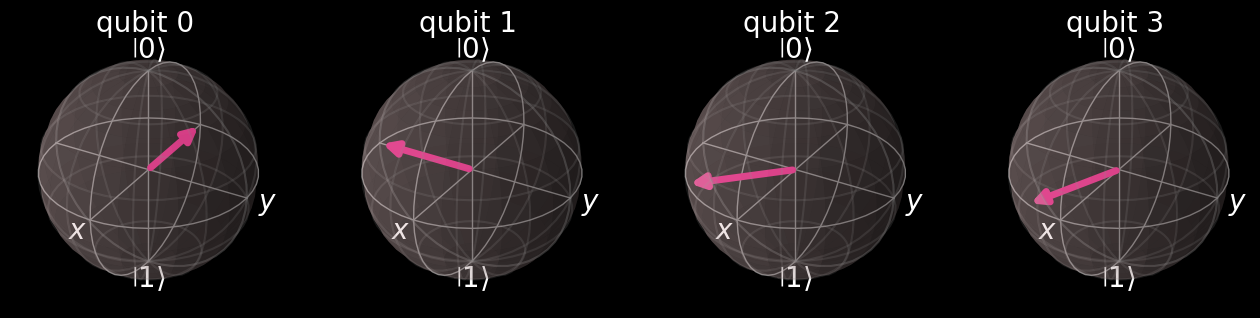

In [49]:
all_states = ["0000","0001","0010","0011","0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","1110","1111"]

for state in all_states:
    circuit = QuantumCircuit(len(state))

    circuit.initialize(Statevector.from_label(state).data, circuit.qubits[::-1])


    print("Computational Basis:", state)

    circuit.append(myQFT(len(state)), circuit.qubits)

    print("Fourier Basis") ; display(qv.plot_bloch_multivector(Statevector.from_instruction(circuit).data))